Index(['Name', 'Department', 'Salary (JOD)', 'Years in Company', 'Position'], dtype='object')
Maximum Adjusted Salary: 1800.0
Minimum Adjusted Salary: 472.5
                Name Department  Salary (JOD)  Years in Company  \
0           John Doe      Sales           800                 5   
1         Jane Smith  Marketing           600                 3   
2        Bob Johnson         HR           500                 2   
3        Alice Brown         IT          1000                 7   
4      Charlie Davis    Finance          1200                10   
5       David Wilson      Sales           700                 4   
6          Eve Moore  Marketing           550                 3   
7       Frank Taylor         HR           450                 1   
8     Grace Anderson         IT           900                 6   
9        Hank Thomas    Finance          1100                 8   
10       Ivy Jackson      Sales           750                 5   
11        Jack White  Marketing        

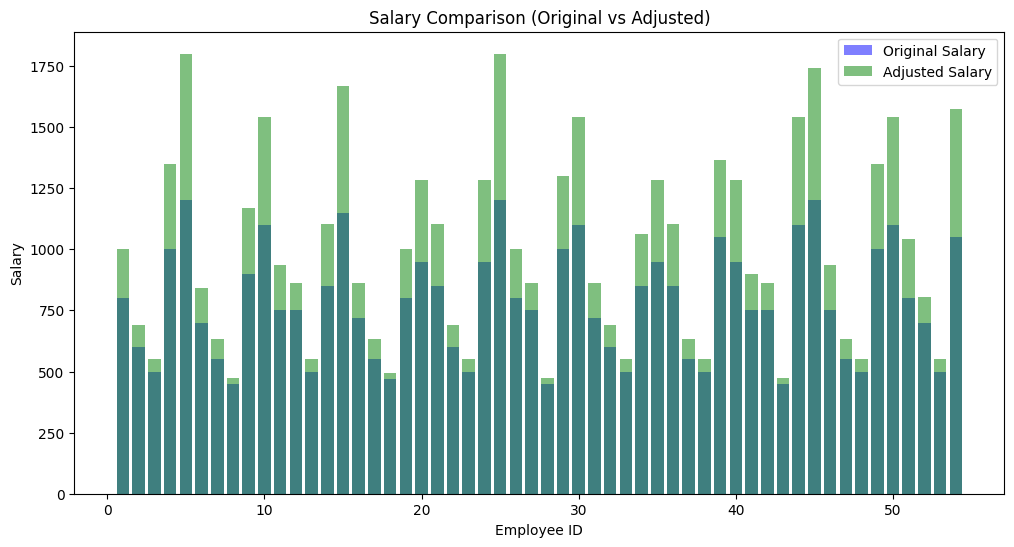

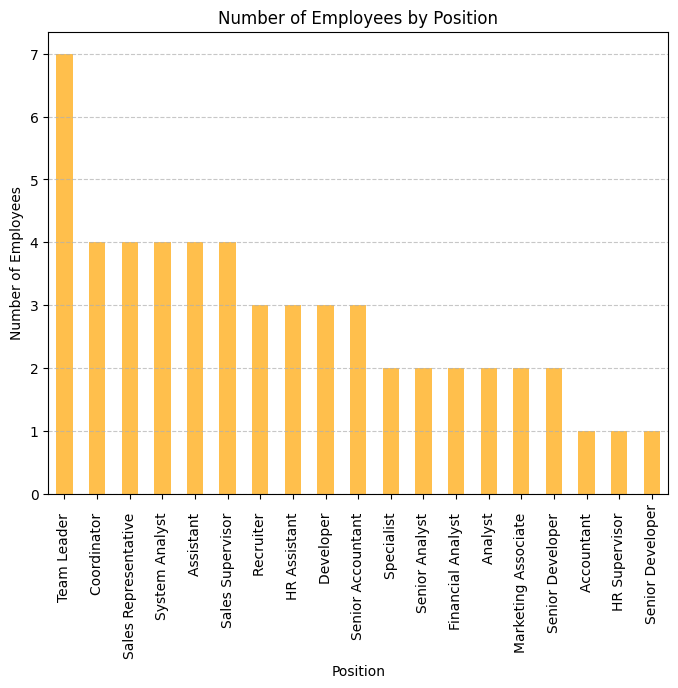

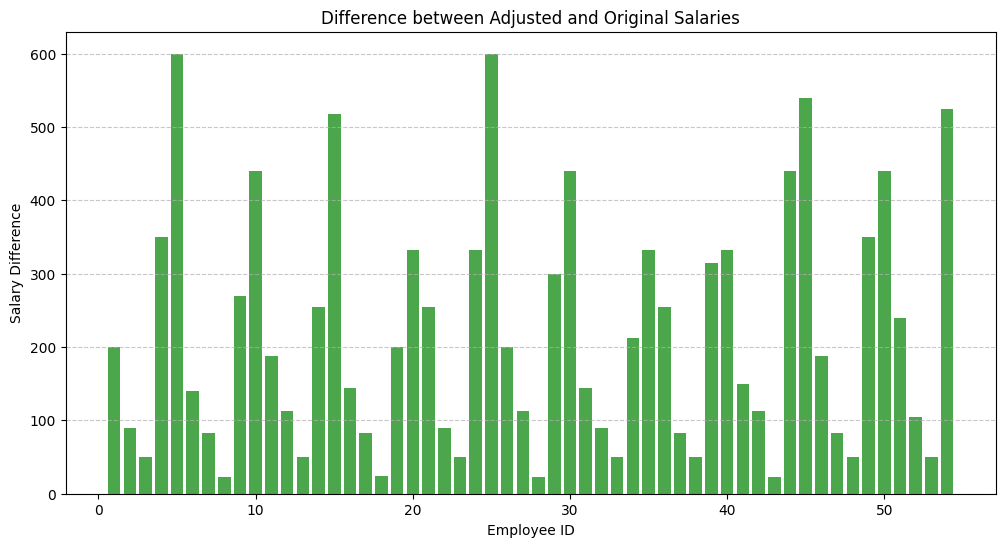

The modified data has been saved to the file: employees_with_adjusted_salaries.csv


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = 'employees.csv'
data = pd.read_csv(file_path)

data.columns = data.columns.str.strip()

print(data.columns)

class Employee:
    def __init__(self, name, department, salary, years_in_company, position):
        self.name = name
        self.department = department
        self.salary = salary
        self.years_in_company = years_in_company
        self.position = position

    def calculate_adjusted_salary(self):
        years_bonus = self.salary * 0.05 * self.years_in_company
        position_bonus = 0
        if self.position == 'Team Leader':
            position_bonus = 0.2 * self.salary
        elif self.position == 'Specialist':
            position_bonus = 0.1 * self.salary
        elif self.position == 'Coordinator':
            position_bonus = 0.05 * self.salary
        elif self.position == 'Sales Representative':
            position_bonus = 0.04 * self.salary
        elif self.position == 'Senior Accountant':
            position_bonus = 0.15 * self.salary
        elif self.position == 'Recruiter':
            position_bonus = 0.03 * self.salary
        elif self.position == 'System Analyst':
            position_bonus = 0.12 * self.salary
        elif self.position == 'Developer':
            position_bonus = 0.1 * self.salary
        elif self.position == 'Analyst':
            position_bonus = 0.08 * self.salary
        elif self.position == 'Financial Analyst':
            position_bonus = 0.1 * self.salary
        elif self.position == 'HR Assistant':
            position_bonus = 0.02 * self.salary
        elif self.position == 'HR Supervisor':
            position_bonus = 0.05 * self.salary
        elif self.position == 'Senior Developer':
            position_bonus = 0.15 * self.salary
        elif self.position == 'Sales Supervisor':
            position_bonus = 0.1 * self.salary
        elif self.position == 'Marketing Associate':
            position_bonus = 0.07 * self.salary

        return self.salary + years_bonus + position_bonus

employees = []
for index, row in data.iterrows():
    emp = Employee(
        name=row['Name'],
        department=row['Department'],
        salary=row['Salary (JOD)'],  
        years_in_company=row['Years in Company'], 
        position=row['Position'] 
    )
    employees.append(emp)

adjusted_salaries = []
for emp in employees:
    adjusted_salaries.append(emp.calculate_adjusted_salary())

data['Adjusted Salary'] = adjusted_salaries
data['Employee ID'] = range(1, len(data) + 1)

max_salary = np.max(data['Adjusted Salary'])
min_salary = np.min(data['Adjusted Salary'])

print(f"Maximum Adjusted Salary: {max_salary}")
print(f"Minimum Adjusted Salary: {min_salary}")

print(data)

plt.figure(figsize=(12, 6))
plt.bar(data['Employee ID'], data['Salary (JOD)'], alpha=0.5, label='Original Salary', color='blue')
plt.bar(data['Employee ID'], data['Adjusted Salary'], alpha=0.5, label='Adjusted Salary', color='green')
plt.xlabel('Employee ID')
plt.ylabel('Salary')
plt.title('Salary Comparison (Original vs Adjusted)')
plt.legend()
plt.show()

positions_count = data['Position'].value_counts()
plt.figure(figsize=(8, 6))
positions_count.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Number of Employees by Position')
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

data['Salary Difference'] = data['Adjusted Salary'] - data['Salary (JOD)']
plt.figure(figsize=(12, 6))
plt.bar(data['Employee ID'], data['Salary Difference'], color='green', alpha=0.7)
plt.xlabel('Employee ID')
plt.ylabel('Salary Difference')
plt.title('Difference between Adjusted and Original Salaries')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

output_file = 'employees_with_adjusted_salaries.csv'
data.to_csv(output_file, index=False)
print(f"The modified data has been saved to the file: {output_file}")